# this is my dr trying

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
train=pd.read_csv("./small_train.csv")
# print train.info()
# print train.iloc[1,0],"\n",train.iloc[1:,0]
# print train.

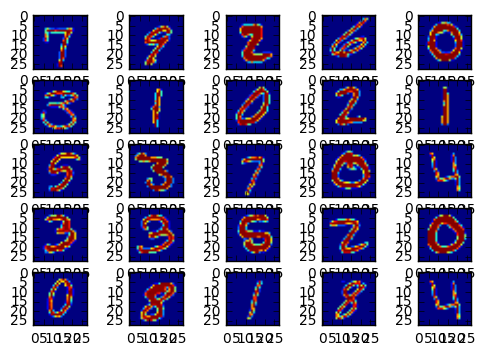

In [21]:
# for i in range(10):
#     print i
#     img=train.iloc[i,1:].values.reshape(28,28)
#     plt.imshow(img)
img=train.iloc[3,1:].values.reshape(28,28)
plt.imshow(img)
plt.show()
# print train.iloc[1:,0].values.reshape(19,19)
# print np.sqrt(1999)
# print 1998/2
# print 28**2

In [22]:
import matplotlib.pyplot as plt
plt.hist(train["label"])
plt.title("Frequency Histogram of Numbers in Training Data")
plt.xlabel("Number Value")
plt.ylabel("Frequency")
# plt.show()

In [23]:
# import math
# # plot the first 25 digits in the training set. 
# f, ax = plt.subplots(5, 5)
# # plot some 4s as an example
# for i in range(1,26):
#     # Create a 1024x1024x3 array of 8 bit unsigned integers
#     data = train.iloc[i,1:785].values #this is the first number
#     grid = data.reshape((28, 28))
#     n=math.ceil(i/5)-1
#     m=[0,1,2,3,4]*5
#     ax[m[i-1], n].imshow(grid)
# plt.show()

In [25]:
## normalize data ##
# print train.describe()
# print train.head()
label_train=train['label']
# print label_train
train=train.drop('label', axis=1)

# #normalize data
train = train / 255
# # test = test / 255
train['label'] = label_train

In [26]:
print train.head()

   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel9  ...    pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     0.0  ...         0.0       0.0       0.0       0.0       0.0       0.0   
1     0.0  ...         0.0       0.0       0.0       0.0       0.0       0.0   
2     0.0  ...         0.0       0.0       0.0       0.0       0.0       0.0   
3     0.0  ...         0.0       0.0       0.0       0.0       0.0       0.0   
4     0.0  ...         0.0       0.0       0.0       0.0       0.0       0.0   

   pixel781  pixel782  pixel783  label  
0       0.0    

In [28]:
from sklearn import decomposition
from sklearn import datasets

## PCA decomposition
pca = decomposition.PCA(n_components=200) #Finds first 200 PCs
pca.fit(train.drop('label', axis=1))
plt.plot(pca.explained_variance_ratio_)
plt.ylabel('% of variance explained')
#plot reaches asymptote at around 50, which is optimal number of PCs to use. 
# plt.show()
## PCA decomposition with optimal number of PCs
#decompose train data
pca = decomposition.PCA(n_components=50) #use first 3 PCs (update to 100 later)
pca.fit(train.drop('label', axis=1))
PCtrain = pd.DataFrame(pca.transform(train.drop('label', axis=1)))
PCtrain['label'] = train['label']
print PCtrain
#decompose test data
#pca.fit(test)
# PCtest = pd.DataFrame(pca.transform(test))

             0         1         2         3         4         5         6  \
0    -2.811722  2.713638  0.480723  0.020127 -0.712185 -1.831009 -1.376644   
1     6.562517  2.037337 -2.954818  0.156814 -1.439388 -2.435543  1.966749   
2    -3.450060  0.805175  0.260828 -0.148829 -1.629512  1.218818  1.272147   
3    -0.543706 -0.786553 -0.917154  2.320166 -2.417470 -0.539476 -1.364728   
4     7.355399  2.453827 -3.367243 -0.723669 -1.898317 -3.281084  2.152929   
5     1.829182 -0.493218 -0.516009 -0.465824 -0.119924 -0.113343 -2.036828   
6    -2.607726 -1.780204 -1.945921 -0.417263 -0.609237 -1.095347  1.180693   
7    -0.617646  0.222787 -2.200400 -0.714519 -0.364928 -0.847283 -1.228409   
8     1.093589 -0.633490 -1.029603 -2.076822  2.030735  2.350096 -2.373630   
9     1.050600  3.236819 -0.194090 -0.662588 -0.068894  0.273542  1.537455   
10    0.845860 -2.161307  1.734118 -3.592417  2.472127 -0.809795  1.120530   
11   -1.410429 -1.844986  1.574632 -2.168437  0.940657 -1.115475

In [34]:
from sklearn.neural_network import MLPClassifier
y = PCtrain['label'][0:2000]
X=PCtrain.drop('label', axis=1)[0:2000]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(50,), random_state=1)
print clf.fit(X, y)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)


In [40]:
# print PCtrain.head()
# print PCtrain.info()
from sklearn import  metrics
#accuracy and confusion matrix
predicted = clf.predict(PCtrain.drop('label', axis=1)[1001:1200])
expected = PCtrain['label'][1001:1200]

print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False):
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       1.00      1.00      1.00        19
          2       1.00      1.00      1.00        26
          3       1.00      1.00      1.00        16
          4       1.00      1.00      1.00        21
          5       1.00      1.00      1.00        21
          6       1.00      1.00      1.00        18
          7       1.00      1.00      1.00        22
          8       1.00      1.00      1.00        25
 

In [ ]:
output = pd.DataFrame(clf.predict(PCtest), columns =['Label'])
output.reset_index(inplace=True)
output.rename(columns={'index': 'ImageId'}, inplace=True)
output['ImageId']=output['ImageId']+1
output.to_csv('output.csv', index=False)